<a href="https://colab.research.google.com/github/AlexCho96/pgf5393-atividade-2/blob/main/Atividade_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando bibliotecas e dados

In [ ]:
RANDOM_STATE = 42

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, PredictionErrorDisplay
from sklearn.inspection import permutation_importance
import statsmodels.api as sm
import shap
import joblib
import warnings
warnings.filterwarnings("ignore")
np.random.seed(RANDOM_STATE)

## Preparando o ambiente e carregando dados

### Baixando e carregando os dados

In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/tiagofiorini/MLinPhysics/main/Superconductivity.csv')
X = dados
dados

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


### Análise exploratória

In [ ]:
print(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [ ]:
print("Tipos das colunas: ", dados.dtypes.value_counts())

Tipos das colunas:  float64    79
int64       3
Name: count, dtype: int64


#### a. Volume de Dados

In [ ]:
print("Dimensões:", dados.shape)

Dimensões: (21263, 82)


#### b. Dados numéricos e não-numéricos

In [ ]:
numeric_cols = dados.select_dtypes(include=[np.number]).columns.tolist()
non_numeric_cols = [c for c in dados.columns if c not in numeric_cols]
print("Colunas numéricas detectadas:", numeric_cols)
print("Colunas não-numéricas:", non_numeric_cols)

Colunas numéricas detectadas: ['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass', 'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass', 'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass', 'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie', 'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie', 'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie', 'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius', 'wtd_gmean_atomic_radius', 'entropy_atomic_radius', 'wtd_entropy_atomic_radius', 'range_atomic_radius', 'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius', 'mean_Density', 'wtd_mean_Density', 'gmean_Density', 'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density', 'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density', 'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity', 'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity', 'entropy_ElectronAffinity

#### c. Dados Faltantes

In [ ]:
dados.isnull().sum().sort_values(ascending=False).head()

,0
number_of_elements,0
mean_atomic_mass,0
wtd_mean_atomic_mass,0
gmean_atomic_mass,0
wtd_gmean_atomic_mass,0


#### d. Análise estatística de Critical Temp

Estatísticas da target:


,critical_temp
count,21263.000000
mean,34.421219
std,34.254362
min,0.000210
25%,5.365000
50%,20.000000
75%,63.000000
max,185.000000


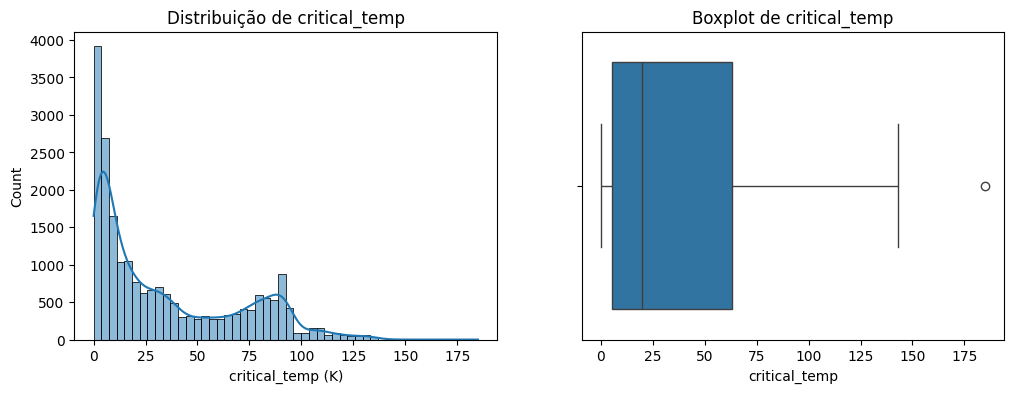

In [ ]:
target = "critical_temp"
print("Estatísticas da target:")
display(dados['critical_temp'].describe())

# Plot de histograma e boxplot, lado a lado
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(dados[target], bins=50, kde=True)
plt.title("Distribuição de critical_temp")
plt.xlabel("critical_temp (K)")

# Boxplot para visualizar outliers
plt.subplot(1,2,2)
sns.boxplot(x=dados[target])
plt.title("Boxplot de critical_temp")
plt.show()


#### e. Correlação

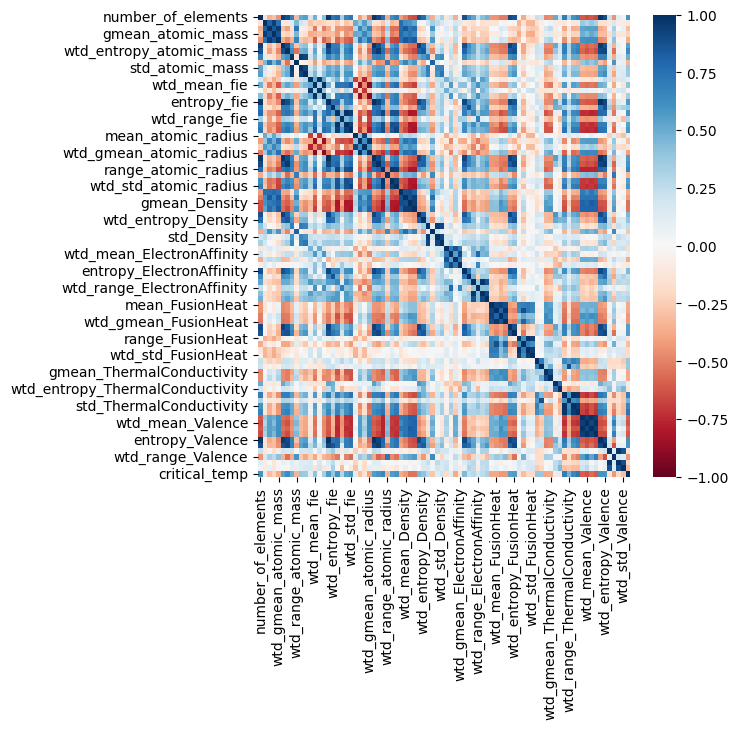

In [ ]:
# Geral
matriz_corr = dados.corr().round(2)
plt.figure(figsize=(6,6))
sns.heatmap(matriz_corr, cmap = 'RdBu', vmin=-1, vmax=1);

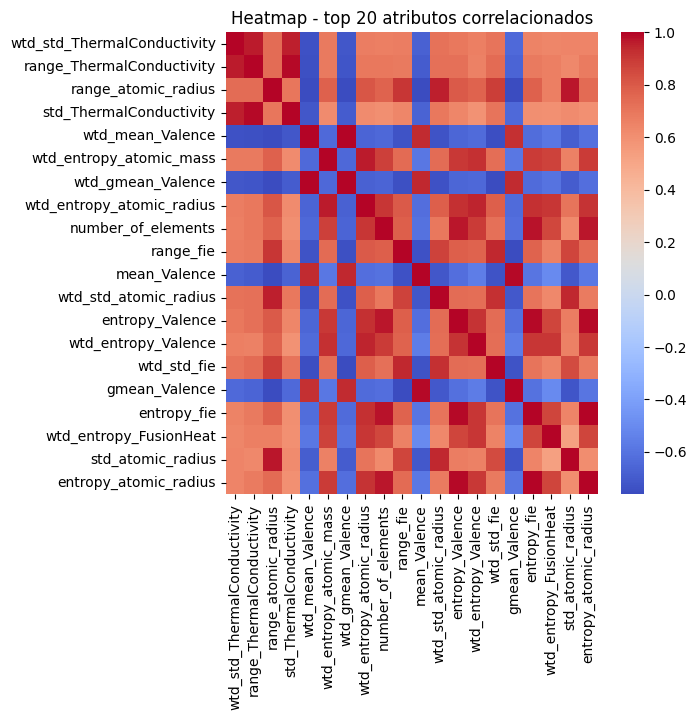

In [ ]:
# Variáveis mais correlacionadas com a temperatura crítica
corr = dados.corr()[target].sort_values(ascending=False)

# Top 20 correlações em módulo
plt.figure(figsize=(6,6))
top_feats = corr.abs().sort_values(ascending=False).iloc[1:21].index
sns.heatmap(dados[top_feats].corr(), annot=False, cmap="coolwarm")
plt.title("Heatmap - top 20 atributos correlacionados")
plt.show()

### Preparação dos dados

In [ ]:
X = dados.drop(columns=[target])
y = dados[target].values

##### Amostragem Aleatória

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (17010, 81) Test shape: (4253, 81)


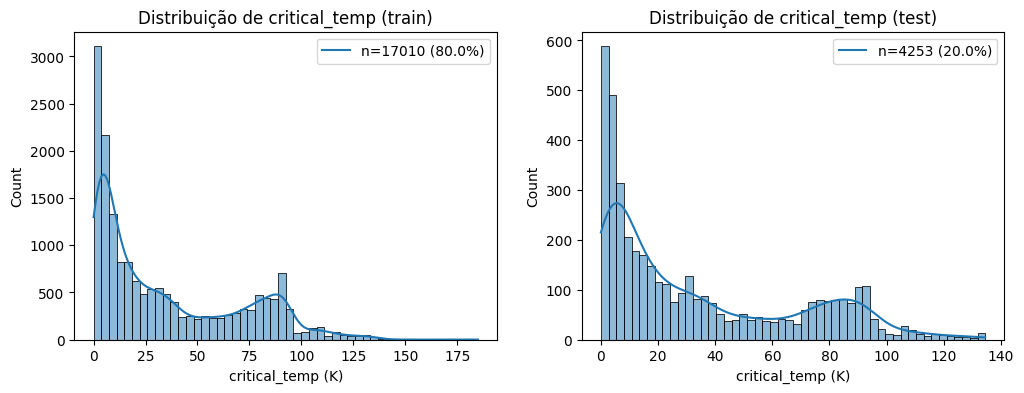

In [ ]:
# Checa distribuição de y_train e y_test
# Adiciona uma legenda, mostrando a quantidade dividida em cada caso
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(y_train, bins=50, kde=True)
plt.title("Distribuição de critical_temp (train)")
plt.xlabel("critical_temp (K)")
plt.legend([f"n={len(y_train)} ({round((100*len(y_train)/len(y)),2)}%)"])

plt.subplot(1,2,2)
sns.histplot(y_test, bins=50, kde=True)
plt.title("Distribuição de critical_temp (test)")
plt.xlabel("critical_temp (K)")
plt.legend([f"n={len(y_test)} ({round(100*len(y_test)/len(y),2)}%)"])
plt.show()

## Escalonamento - StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)

### Modelo de Regressão Linear Múltipla

In [ ]:
regr = LinearRegression()
regr.fit(X_train_scaled, y_train)

y_pred_train = regr.predict(X_train_scaled)
y_pred_test = regr.predict(X_test_scaled)

print("Intercepto: ", regr.intercept_)
print("Coeficientes: ", regr.coef_)

Intercepto:  34.533300974426815
Coeficientes:  [ -4.94668538  25.97089449 -32.20422896 -16.28250328  25.40017724
 -13.1055588    1.94645411  12.14965571   0.99628876 -11.61910357
   1.9176384    8.68421536  -8.67392282  -7.34722104  10.01850888
 -38.40567366  14.69656221  20.73332306   4.72013475 -20.23788499
  -5.3516697   -6.35627405  83.17011393  -0.45793373 -89.13930844
  23.9697541   17.40940051  14.29307428  -3.46434334 -11.35992531
  -5.79708409 -14.98118827   1.39182755   5.85623239   7.27250205
   5.73062712  -6.61016027  -6.72572172  -0.52157497  11.11237979
  -3.11539092  -3.83824356  17.46891237   6.16125899 -18.95144406
   2.02123366  -6.41324295 -22.44889148  -4.21457431  28.25129097
 -11.4875505   20.34704712 -28.98242244 -15.88682367  21.7788321
  -7.92341027   9.96541366  -7.21243079   7.38580883  -6.11846322
   6.35760322  -2.65295022  25.06210957  -1.79910657 -13.92842216
   3.65186459   0.28166798 -14.454934    -9.8873621   17.94028565
  -1.97909021 -18.06339954  27

In [ ]:
metrics = {
    'Métrica': ['R²', 'MSE', 'MAE'],
    'Treino': [r2_score(y_train, y_pred_train), mean_squared_error(y_train, y_pred_train), mean_absolute_error(y_train, y_pred_train)],
    'Teste': [r2_score(y_test, y_pred_test), mean_squared_error(y_test, y_pred_test), mean_absolute_error(y_test, y_pred_test)]
}
display((pd.DataFrame(metrics)).style.hide(axis="index"))

Métrica,Treino,Teste
R²,0.736836,0.737631
MSE,310.217999,302.007513
MAE,13.325392,13.210522


In [ ]:
# Modelo com todos os preditores - statsmodels
X_train_sm = sm.add_constant(X_train) # adicionar uma coluna constante para o statsmodels ajustar um itercepto
mod = sm.OLS(y_train, X_train_sm) # ajustar o modelo
regsm = mod.fit()
print(regsm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     585.1
Date:                Fri, 24 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:35:42   Log-Likelihood:                -72932.
No. Observations:               17010   AIC:                         1.460e+05
Df Residuals:                   16928   BIC:                         1.467e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

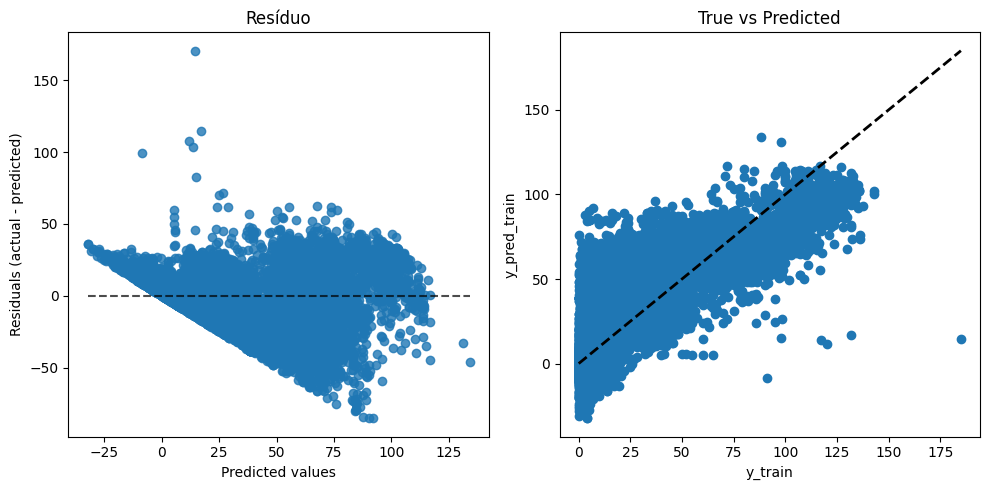

In [ ]:
# Gráfico dos resíduos para o conjunto de treinamento
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

plotresid = PredictionErrorDisplay(y_true=y_train, y_pred=y_pred_train)
plotresid.plot(ax=ax[0]) # Plot on the first axes
ax[0].set_title('Resíduo')

ax[1].scatter(y_train, y_pred_train)
ax[1].set_xlabel('y_train')
ax[1].set_ylabel('y_pred_train')
ax[1].set_title('True vs Predicted')
# Add a 1:1 dashed line
ax[1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.tight_layout() # Adjust layout to prevent overlapping titles
plt.show()

### Modelo de Regressão Ridge

In [ ]:
ridge = Ridge(alpha=1.0, random_state=RANDOM_STATE)
ridge.fit(X_train_scaled, y_train)

y_pred_train = ridge.predict(X_train_scaled)
y_pred_test = ridge.predict(X_test_scaled)

metrics = {
    'Métrica': ['R²', 'MSE', 'MAE'],
    'Treino': [r2_score(y_train, y_pred_train), mean_squared_error(y_train, y_pred_train), mean_absolute_error(y_train, y_pred_train)],
    'Teste': [r2_score(y_test, y_pred_test), mean_squared_error(y_test, y_pred_test), mean_absolute_error(y_test, y_pred_test)]
}
display((pd.DataFrame(metrics)).style.hide(axis="index"))

Métrica,Treino,Teste
R²,0.736589,0.736844
MSE,310.508881,302.913725
MAE,13.327255,13.218695


### RandomForest - baseline e importâncias
#### Configuração default

In [ ]:
rf = RandomForestRegressor(random_state=RANDOM_STATE)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

print("RandomForest Test (n_estimators = 100)")
metrics = {
    'Métrica': ['R²', 'MSE', 'MAE'],
    'Valor': [r2_score(y_test, y_pred_rf),
              mean_squared_error(y_test, y_pred_rf),
              mean_absolute_error(y_test, y_pred_rf)
            ],
}
display((pd.DataFrame(metrics)).style.hide(axis="index"))

RandomForest Test (n_estimators = 100)


Métrica,Valor
R²,0.929350
MSE,81.324102
MAE,5.110268


#### Alterando n_estimators para 200

In [ ]:
rf = RandomForestRegressor(n_estimators=200, random_state=RANDOM_STATE, n_jobs=-1)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

print("RandomForest Test (n_estimators = 200)")
metrics = {
    'Métrica': ['R²', 'MSE', 'MAE'],
    'Valor': [r2_score(y_test, y_pred_rf),
              mean_squared_error(y_test, y_pred_rf),
              mean_absolute_error(y_test, y_pred_rf)
            ],
}
display((pd.DataFrame(metrics)).style.hide(axis="index"))

RandomForest Test (n_estimators = 200)


Métrica,Valor
R²,0.930020
MSE,80.553039
MAE,5.077238


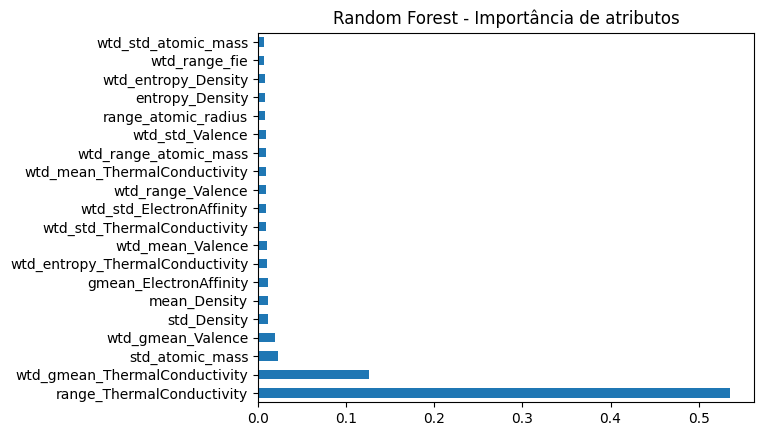

In [ ]:
# Importância das features
importances = pd.Series(rf.feature_importances_, index=X.columns)
pd.Series(importances, index=X.columns).sort_values(ascending=False).head(20).plot.barh()
plt.title("Random Forest - Importância de atributos")
plt.show()

In [ ]:
# Permutation importance
perm = permutation_importance(rf, X, y, random_state=RANDOM_STATE, n_jobs=-1)
perm_importances = pd.Series(perm.importances_mean, index=X.columns).sort_values(ascending=False)
print(perm_importances.head(20))

wtd_entropy_atomic_radius       0.011622
wtd_std_Valence                 0.003163
wtd_entropy_Density             0.002246
wtd_entropy_ElectronAffinity    0.001691
entropy_atomic_mass             0.001363
wtd_std_atomic_mass             0.001317
entropy_Valence                 0.001296
wtd_std_Density                 0.001182
entropy_FusionHeat              0.001141
entropy_fie                     0.001016
wtd_std_fie                     0.000944
std_fie                         0.000919
number_of_elements              0.000764
std_ThermalConductivity         0.000568
wtd_range_atomic_mass           0.000476
wtd_range_fie                   0.000439
wtd_range_Density               0.000103
wtd_range_atomic_radius         0.000085
range_atomic_mass               0.000078
wtd_std_FusionHeat              0.000063
dtype: float64


### Relação com a variável alvo (temperatura crítica)

Os atributos apresentados (a partir do Método de Permutação) são derivados de propriedades atômicas dos elementos que compõem os materiais analisados (tais como raio atômico, massa atômica, energia de ionização, afinidade eletrônica) que influenciam na estrutura cristalina e distribuição eletrônica Consequentemente, esses atributos contribuem para a definição da temperatura crítica (Tc).

Para os próximos passos, consideraremos somente os 10 primeiros, que possuem importância maior que 0.0010.

### PCA: ajuste e escolha do número de componentes

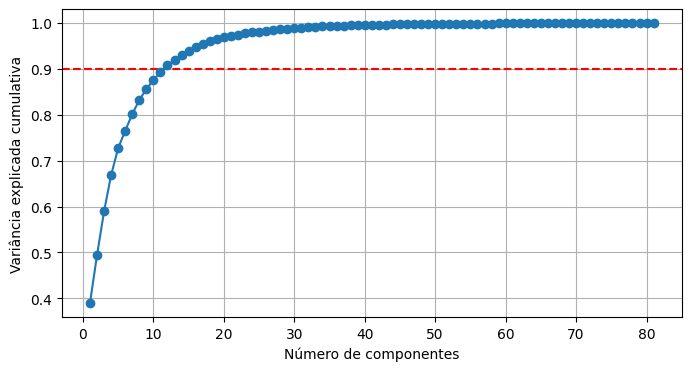

Componentes para 90% variância: 12


In [ ]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
explained_ratio = pca.explained_variance_ratio_.cumsum()

# plot do explained variance
plt.figure(figsize=(8,4))
plt.axhline(0.90, color='r', linestyle='--')
plt.plot(np.arange(1, len(explained_ratio)+1), explained_ratio, marker='o')
plt.xlabel("Número de componentes")
plt.ylabel("Variância explicada cumulativa")
plt.grid(True)
plt.show()

# Componentes que explicam 90% da variância
n90 = np.searchsorted(explained_ratio, 0.90) + 1
print("Componentes para 90% variância:", n90)

### Criar datasets reduzidos: (A) top features union, (B) PCA com n_components_95

### Regressão linear
#### a. Features selecionadas

In [ ]:
features_selec = perm_importances.head(5)
X_train_sel = X_train[features_selec.index].copy()
X_test_sel = X_test[features_selec.index].copy()

In [ ]:
lin_reg1 = LinearRegression()
lin_reg1.fit(X_train_sel, y_train)

y_pred_train_a = lin_reg1.predict(X_train_sel)
y_pred_test_a = lin_reg1.predict(X_test_sel)

print("Linear - Features Selecionadas:")
metrics = {
    'Métrica': ['R²', 'MSE', 'MAE'],
    'Treino': [r2_score(y_train, y_pred_train_a),
              mean_squared_error(y_train, y_pred_train_a),
              mean_absolute_error(y_train, y_pred_train_a)
            ],
    'Teste': [r2_score(y_test, y_pred_test_a),
              mean_squared_error(y_test, y_pred_test_a),
              mean_absolute_error(y_test, y_pred_test_a)
            ]
}
display((pd.DataFrame(metrics)).style.hide(axis="index"))

Linear - Features Selecionadas:


Métrica,Treino,Teste
R²,0.508120,0.525672
MSE,579.827779,545.989821
MAE,19.195878,18.780705


#### b. PCA


In [ ]:
pca_n = min(n90, X_train_scaled.shape[1])
pca_model = PCA(n_components=pca_n, random_state=RANDOM_STATE)
X_train_pca_n = pca_model.fit_transform(X_train_scaled)
X_test_pca_n = pca_model.transform(X_test_scaled)
print("Componentes PCA:", pca_n)

Componentes PCA: 12


In [ ]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_train_pca_n, y_train)

y_pred_train_b = lin_reg2.predict(X_train_pca_n)
y_pred_test_b = lin_reg2.predict(X_test_pca_n)

print("Linear - PCA:")
metrics = {
    'Métrica': ['R²', 'MSE', 'MAE'],
    'Treino': [r2_score(y_train, y_pred_train_b),
              mean_squared_error(y_train, y_pred_train_b),
              mean_absolute_error(y_train, y_pred_train_b)
            ],
    'Teste': [r2_score(y_test, y_pred_test_b),
              mean_squared_error(y_test, y_pred_test_b),
              mean_absolute_error(y_test, y_pred_test_b)
            ]
}
display((pd.DataFrame(metrics)).style.hide(axis="index"))

Linear - PCA:


Métrica,Treino,Teste
R²,0.583410,0.602730
MSE,491.076124,457.289888
MAE,17.538837,17.043552


Os resultados retornados, tanto para regressão linear para as features selecionadas, quanto para PCA apresentaram R² baixos, mostrando uma menor eficiência dos modelos em relação ao Random Forest.

### Avaliar desempenho por faixas de critical_temp

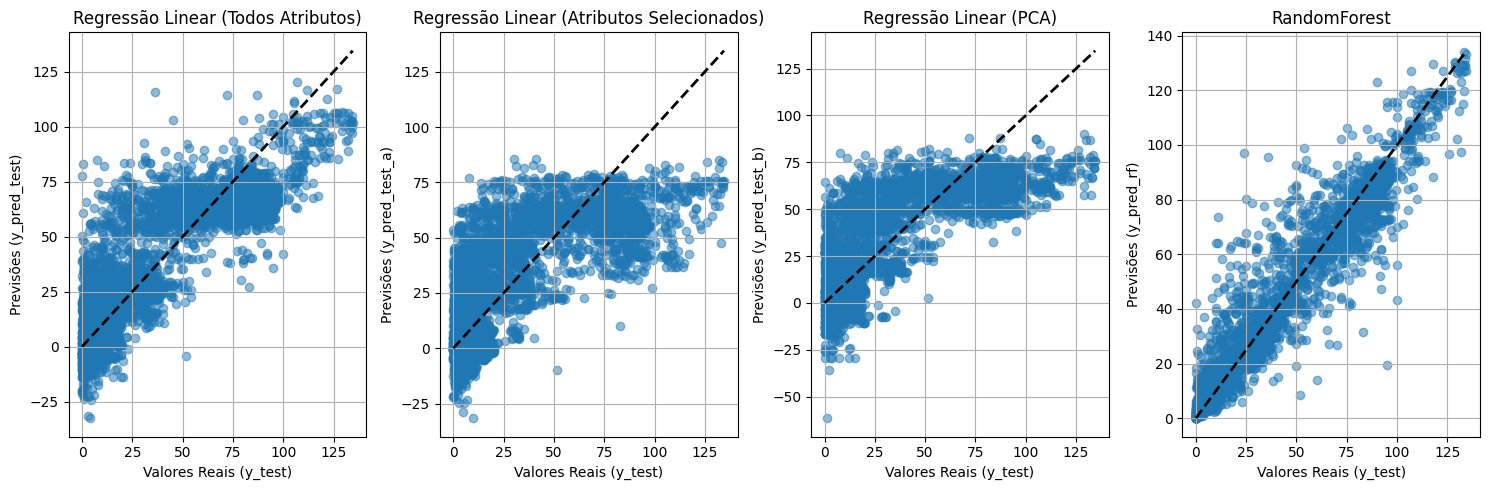

In [ ]:
plt.figure(figsize=(15, 5))

# Plot para Regressão Linear (todos os atributos)
plt.subplot(1, 4, 1)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Valores Reais (y_test)")
plt.ylabel("Previsões (y_pred_test)")
plt.title("Regressão Linear (Todos Atributos)")
plt.grid(True)

# Plot para Regressão Linear (atributos selecionados)
plt.subplot(1, 4, 2)
plt.scatter(y_test, y_pred_test_a, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Valores Reais (y_test)")
plt.ylabel("Previsões (y_pred_test_a)")
plt.title("Regressão Linear (Atributos Selecionados)")
plt.grid(True)

# Plot para Regressão Linear (PCA)
plt.subplot(1, 4, 3)
plt.scatter(y_test, y_pred_test_b, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Valores Reais (y_test)")
plt.ylabel("Previsões (y_pred_test_b)")
plt.title("Regressão Linear (PCA)")
plt.grid(True)

# Plot para RandomForest
plt.subplot(1, 4, 4)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Valores Reais (y_test)")
plt.ylabel("Previsões (y_pred_rf)")
plt.title("RandomForest")
plt.grid(True)


plt.tight_layout()
plt.show()

Consequentemente, os gráficos nos mostram que os modelo não são capaz de predizer diferentes faixas de valores de temperatura crítica.

### Plot comparativo de métricas (R2) para modelos testados

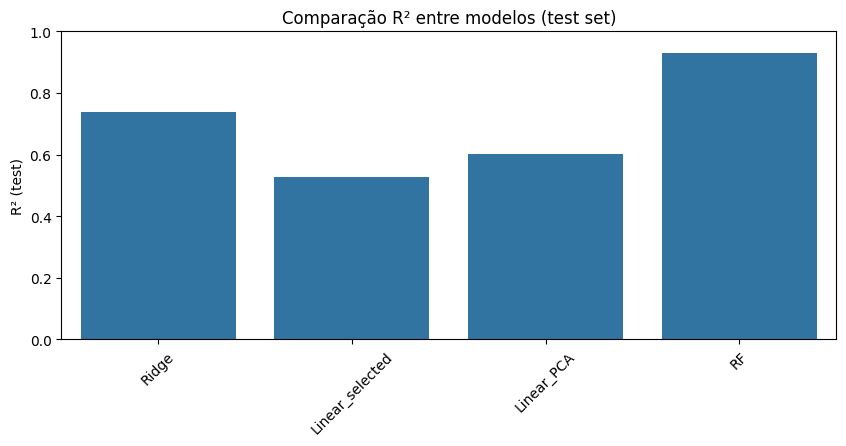

In [ ]:
models_results = {
    "Ridge": r2_score(y_test, y_pred_test := ridge.predict(X_test_scaled)),
    "Linear_selected": r2_score(y_test, y_pred_test_a),
    "Linear_PCA": r2_score(y_test, y_pred_test_b),
    "RF": r2_score(y_test, y_pred_rf),
}
plt.figure(figsize=(10,4))
sns.barplot(x=list(models_results.keys()), y=list(models_results.values()))
plt.xticks(rotation=45)
plt.ylabel("R² (test)")
plt.ylim(0, 1)
plt.title("Comparação R² entre modelos (test set)")
plt.show()

## Modelo de regressão baseado em Random Forest

#### a. Features selecionados

In [ ]:
rf = RandomForestRegressor(n_estimators=200, random_state=RANDOM_STATE, n_jobs=-1)
rf.fit(X_train_sel, y_train)

y_pred_rf_sel = rf.predict(X_test_sel)

print("RandomForest Test (n_estimators = 200)")
metrics = {
    'Métrica': ['R²', 'MSE', 'MAE'],
    'Valor': [r2_score(y_test, y_pred_rf_sel),
              mean_squared_error(y_test, y_pred_rf_sel),
              mean_absolute_error(y_test, y_pred_rf_sel)
            ],
}
display((pd.DataFrame(metrics)).style.hide(axis="index"))

RandomForest Test (n_estimators = 200)


Métrica,Valor
R²,0.899428
MSE,115.765896
MAE,6.337937


#### b. PCA

In [ ]:
rf = RandomForestRegressor(n_estimators=200, random_state=RANDOM_STATE, n_jobs=-1)
rf.fit(X_train_pca_n, y_train)

y_pred_rf_pca = rf.predict(X_test_pca_n)

print("RandomForest Test (n_estimators = 200)")
metrics = {
    'Métrica': ['R²', 'MSE', 'MAE'],
    'Valor': [r2_score(y_test, y_pred_rf_pca),
              mean_squared_error(y_test, y_pred_rf_pca),
              mean_absolute_error(y_test, y_pred_rf_pca)
            ],
}
display((pd.DataFrame(metrics)).style.hide(axis="index"))

RandomForest Test (n_estimators = 200)


Métrica,Valor
R²,0.914187
MSE,98.777298
MAE,5.625650


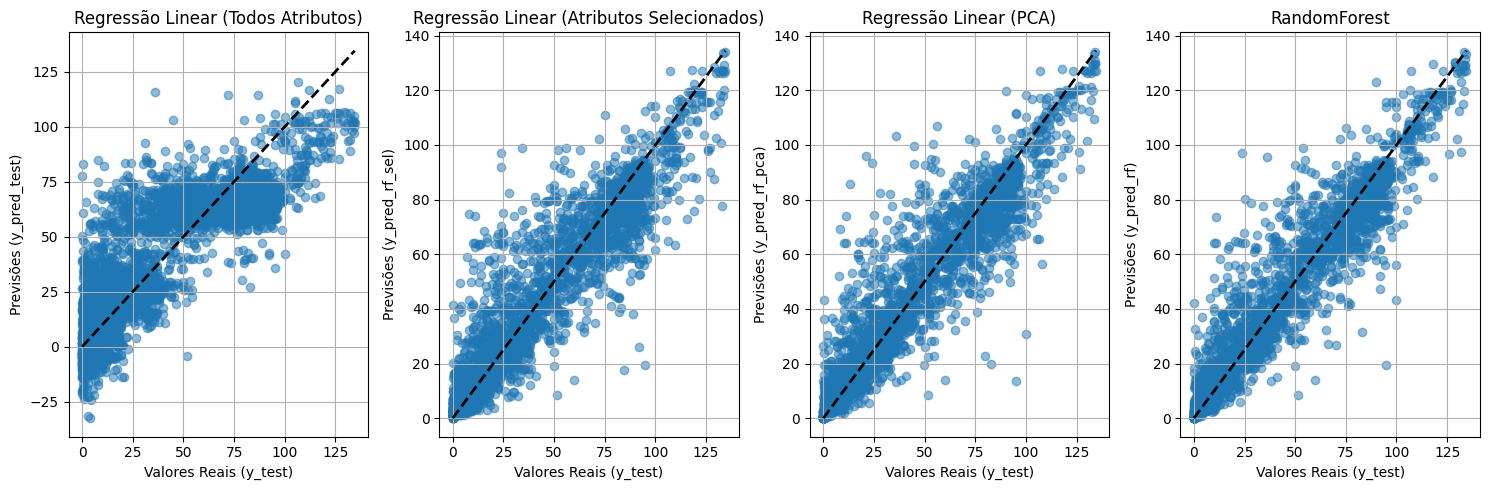

In [ ]:
plt.figure(figsize=(15, 5))

# Plot para Regressão Linear (todos os atributos)
plt.subplot(1, 4, 1)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Valores Reais (y_test)")
plt.ylabel("Previsões (y_pred_test)")
plt.title("Regressão Linear (Todos Atributos)")
plt.grid(True)

# Plot para Regressão Linear (atributos selecionados)
plt.subplot(1, 4, 2)
plt.scatter(y_test, y_pred_rf_sel, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Valores Reais (y_test)")
plt.ylabel("Previsões (y_pred_rf_sel)")
plt.title("Regressão Linear (Atributos Selecionados)")
plt.grid(True)

# Plot para Regressão Linear (PCA)
plt.subplot(1, 4, 3)
plt.scatter(y_test, y_pred_rf_pca, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Valores Reais (y_test)")
plt.ylabel("Previsões (y_pred_rf_pca)")
plt.title("Regressão Linear (PCA)")
plt.grid(True)

# Plot para RandomForest
plt.subplot(1, 4, 4)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Valores Reais (y_test)")
plt.ylabel("Previsões (y_pred_rf)")
plt.title("RandomForest")
plt.grid(True)


plt.tight_layout()
plt.show()

Ao aplicarmos random forest, tanto os atributos selecionados quanto o PCA apresentaram um R² maior, indicando um modelo com desempenho melhor.
E nesse caso, o modelo é capaz de predizer diferentes faixas de valores de temperatura crítica.

O maior problema do random forest é o custo computacional envolvido, principalmente pelo tamanho dos dados que são utilizados, de forma que não permite uma escalabilidade fácil do modelo.
Ao diminuirmos a quantidade de features (ou ainda de componentes principais), pode-se notar um tempo de execução bem menor do random forest.